<a href="https://colab.research.google.com/github/shubhangishelar26/MNIST/blob/main/MNIST_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# load the MNIST digits dataset
mnist = datasets.load_digits()

In [16]:
#  training and testing split
# using 75% of the data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=42)

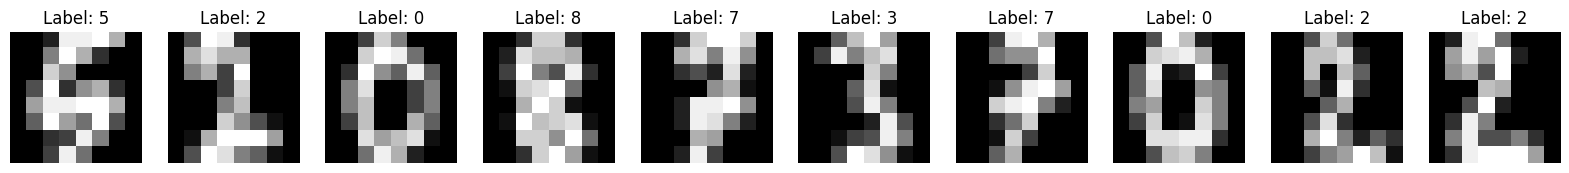

In [17]:
# Show sample digits
num_samples = 10
fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
for i in range(num_samples):
    axes[i].imshow(trainData[i].reshape(8, 8), cmap="gray")
    axes[i].set_title("Label: {}".format(int(trainLabels[i])))
    axes[i].axis('off')
plt.show()


In [ ]:
#  10% od data are use  for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

In [ ]:
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [19]:
kVals = range(1, 30, 2)
accuracies = []

In [20]:
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in kVals:
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=100.00%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=99.26%
k=19, accuracy=98.52%
k=21, accuracy=99.26%
k=23, accuracy=98.52%
k=25, accuracy=98.52%
k=27, accuracy=98.52%
k=29, accuracy=98.52%


In [21]:
# find the value of k that has the largest accuracy
best_k = kVals[np.argmax(accuracies)]
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (best_k,
                                                                       max(accuracies) * 100))


k=1 achieved highest accuracy of 100.00% on validation data


In [22]:
# Re-train our classifier using the best k value
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=1)

In [23]:
# Find the nearest neighbor for each test image and report the label
nearest_neighbor_labels = model.predict(testData)

# Calculate accuracy
accuracy = np.mean(nearest_neighbor_labels == testLabels)
print("Accuracy using nearest neighbor approach:", accuracy)

Accuracy using nearest neighbor approach: 0.9822222222222222


In [24]:
# A final classification report
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, nearest_neighbor_labels))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

